<a href="https://colab.research.google.com/github/Akriti96/Clustering-118--simple-method/blob/main/class_118___simple_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import plotly.express as px

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
df = pd.read_csv("https://raw.githubusercontent.com/whitehatjr/datasets/master/C118/petals_sepals.csv")

df.head()

,petal_size,sepal_size
0,11.323484,13.866161
1,9.265842,13.443414
2,14.329944,7.956200
3,11.883902,7.658534
4,9.957722,12.273535


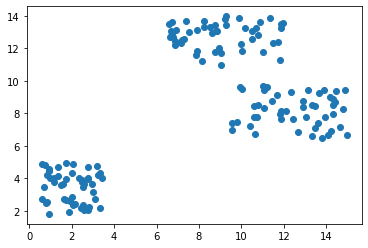

In [4]:
plt.scatter(df["petal_size"],df["sepal_size"])

In [5]:
km=KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
y_predict=km.fit_predict(df[["petal_size","sepal_size"]])
y_predict

array([0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 2, 1, 0, 2, 2, 1, 1, 1, 2, 0,
       0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 1, 0, 1, 1, 2, 0, 0, 0, 2, 1,
       2, 2, 2, 0, 0, 0, 1, 2, 0, 1, 1, 2, 2, 1, 2, 0, 2, 0, 1, 1, 1, 2,
       2, 0, 0, 2, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2,
       1, 0, 1, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 2, 0, 1, 1, 0, 0, 1, 1, 0, 2, 2, 2], dtype=int32)

In [7]:
df["cluter"]=y_predict
df.head()

,petal_size,sepal_size,cluter
0,11.323484,13.866161,0
1,9.265842,13.443414,0
2,14.329944,7.956200,2
3,11.883902,7.658534,2
4,9.957722,12.273535,0


Text(0, 0.5, 'sepal_size')

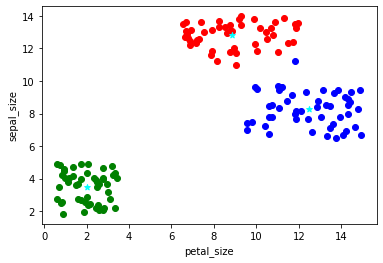

In [9]:
df1=df[df.cluter==0]
df2=df[df.cluter==1]
df3=df[df.cluter==2]
plt.scatter(df1.petal_size,df1["sepal_size"],color="red")
plt.scatter(df2.petal_size,df2["sepal_size"],color="green")
plt.scatter(df3.petal_size,df3["sepal_size"],color="blue")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="cyan",marker="*",label="centroid")
plt.xlabel("petal_size")
plt.ylabel("sepal_size")




In [10]:
km.cluster_centers_

array([[ 8.8567016 , 12.83136004],
       [ 2.00809489,  3.4694147 ],
       [12.47069684,  8.27960708]])

In [11]:
X = df.iloc[:, [0, 1]].values


In [12]:

#Here the range is taken till 11 because we just need 10 cluster points.
wcss = []
k_range= range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)
 

In [13]:
   wcss

[5446.649985340712,
 1276.1239239406564,
 431.97630172772193,
 325.1952958155419,
 219.4073494469312,
 182.3600089173876,
 161.60787845218613,
 138.86696343888602,
 119.51096808110992,
 102.08123579340246]

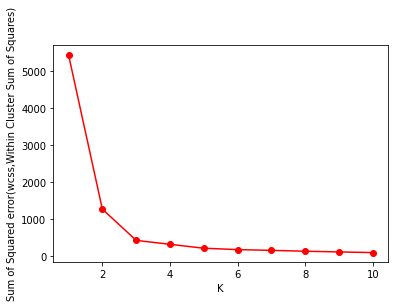

In [14]:
plt.xlabel("K")
plt.ylabel("Sum of Squared error(wcss,Within Cluster Sum of Squares)")
plt.plot(k_range,wcss,marker="o",color='red')